<a href="https://colab.research.google.com/github/sam505/Machine_Learning/blob/master/Alien_Vault_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary packages
import pandas as pd
import plotly

In [ ]:
# read the data
df = pd.read_csv("/content/reputation.data", sep="#", names=["IP", "Val1", "Val2", "Name", "Code", "State", "Coordinates", "Val3"])

# split the coordinate column into latitude and longitude values
df[['Lat','Lon']] = df.Coordinates.str.split(",", expand=True)

# DataFrame with only US values
df_US = df[df.Code == "US"]

# Show preview of the data
df_US.head()

,IP,Val1,Val2,Name,Code,State,Coordinates,Val3,Lat,Lon
3,5.34.246.67,6,3,Spamming,US,NaN,"38.0,-97.0",12,38.0,-97.0
5,66.2.49.232,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11,37.5962982178,-122.065696716
10,66.2.49.244,4,2,Scanning Host,US,Union City,"37.5962982178,-122.065696716",11,37.5962982178,-122.065696716
32,24.218.26.112,4,4,Scanning Host,US,Boston,"42.3583984375,-71.0597991943",11,42.3583984375,-71.0597991943
33,184.154.37.226,6,2,Spamming,US,Chicago,"41.8824996948,-87.6440963745",12,41.8824996948,-87.6440963745


# Create a map of the 48 contiguous States displaying the location of malicious hosts

In [ ]:
# data dictionary for the plot
data = {"type":"scattergeo", 
         "locationmode" : "USA-states", 
         "lon" : df_US["Lon"], 
         "lat": df_US["Lat"], 
         "marker" : {"size" : 8, 
                     "autocolorscale":False, 
                     "colorscale":"magenta"}}

# layout dictionary for the plot
layout = {"title" : "US Map Showing Location of Malicious Hosts",  
          "geo" : {"scope" : "usa", 
                   "projection" : {"type" : "albers usa"}, 
                   "showland" : True, 
                   "landcolor" : "rgb(240, 240, 240)",
                   "subunitcolor" : "rgb(100, 100, 217)", 
                   "countrycolor" : "rgb(10, 10, 10)", 
                   "countrywidth" : 0.1,
                   "showcountries" : True,
                   "subunitwidth" : 0.5}}
# merge the data and layot into a dictionary
fig = {"data" : data, 
       "layout" : layout}

# plotting
plotly.offline.iplot(fig)

# Create a bar chart displaying the top 10 states (Python users may display the top 10 Locales) where malicious hosts are located. The chart must indicate the number of malicious hosts at each location.

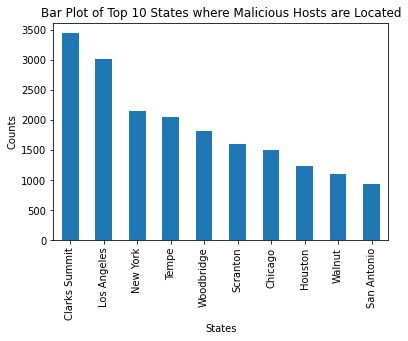

In [ ]:
# Gets the top 10 states and plots a bar chart
df_US["State"].value_counts()[:10].plot(kind='bar', ylabel="Counts", xlabel="States", title="Bar Plot of Top 10 States where Malicious Hosts are Located")

In [ ]:
# Table of top 10 states where malicious hosts are located
df_US["State"].value_counts()[:10]

Clarks Summit    3445
Los Angeles      3019
New York         2140
Tempe            2054
Woodbridge       1807
Scranton         1599
Chicago          1503
Houston          1227
Walnut           1102
San Antonio       927
Name: State, dtype: int64

# Create a bar chart displaying the top 10 types of hosts. The chart must indicate the number of malicious hosts of each type

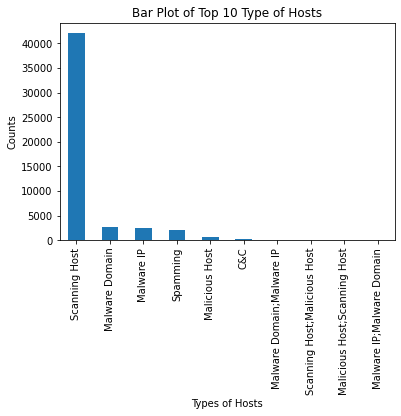

In [ ]:
# Gets the top 10 types of hosts and plots a bar plot
df_US["Name"].value_counts()[:10].plot(kind='bar', ylabel="Counts", xlabel="Types of Hosts", title="Bar Plot of Top 10 Type of Hosts")

In [ ]:
# A table of tup 10 types of malicious hosts 
df_US["Name"].value_counts()[:10]

Scanning Host                   42083
Malware Domain                   2633
Malware IP                       2453
Spamming                         2170
Malicious Host                    589
C&C                               187
Malware Domain;Malware IP          66
Scanning Host;Malicious Host       54
Malicious Host;Scanning Host       43
Malware IP;Malware Domain          26
Name: Name, dtype: int64